#End-to-end data analysis project 

##Data Description:
Carbon Dioxide(CO₂) and Greenhouse Gas(GHG) Emissions

Metadata updates: February 8, 2021

---

Our World in Data (OWID) is a scientific online publication that focuses on large global problems such as poverty, disease, hunger, climate change, war, existential risks, and inequality.
Human emissions of carbon dioxide and other greenhouse gases – are a primary driver of climate change – and present one of the world’s most pressing challenges. OWID mantains a database of the key metrics that influence the change in the climate worldwide since 1750. 

---


The original data from this CSV format used for this analysis comes from https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions.

New data is published on an annual basis.

**Dataset contains 23708 rows, each row representing a country by year and 55 columns with a collection of key metrics from 1750 to 2019.**


##Analysis Purpose:

My goal is to review total CO2 and Greenhouse Gas emissions for USA and China over the 5 year period (from 2012 to 2016) in order to determine if there is an increase in CO2 emissions as well if there is an increase in Greenhouse Gas emissions between United States and China, the most powerful countries in the world. I specifically want to test and determine if the increase in GHG emissions is greater than increase in CO2 emissions, as this would show growing need to adopt legislation and programs by the countries and could have greater impact on slowing the rate and limit the amount of global warming. 

In [ ]:
# Required libraries for analysis
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
import math

# Suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

I am using two datasets found on Github.com with the key metrics merging with one with continents and country codes.

https://github.com/owid/co2-data

https://github.com/hongtaoh/olymvis-data





<details><summary>Click to see column descriptions for the main dataset</summary>
<p>



- **iso_code** - ISO 3166-1 - alpha-3 – 
three-letter country codes	International Organization for Standardization
- **country** - Geographic location	Our World in Data.
- **year** - 	Year of observation	Our World in Data.
- **co2** - Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes per year.	
- **co2_growth_prct**	- Percentage change in CO2 emissions from one year relative to the previous year.	
- **co2_growth_abs** - Annual change in CO2 emissions from one year relative to the previous year, measured in million tonnes.	
- **consumption_co2**	- Annual consumption-based CO2 emissions, measured in million tonnes per year.	
- **trade_co2** -	Net CO2 emissions embedded in trade; this is the net difference between CO2 embedded in exported and imported goods, measured in million tonnes. 
- **trade_co2_share**	- CO2 emissions embedded in trade, given as a percentage of national production-based emissions.	
- **co2_per_capita** - Average per capita CO2 emissions, measured in tonnes per year.	
- **consumption_co2_per_capita** - Per capita consumption-based CO2 emissions, measured in tonnes per year.	
- **share_global_co2** - National or regional annual CO2 emissions, measured as a percentage of the global total.	
- **cumulative_co2** - Cumulative emissions of CO2 from 1751 through to the given year, measured in million tonnes.	
- **share_global_cumulative_co2** - 	National or regional annual cumulative CO2 emissions, measured as a share of the global total.	
- **co2_per_gdp	CO2** - emissions measured per unit of gross domestic product. GDP is adjusted for inflation and cross-country price differences (PPP-adjusted).	
- **consumption_co2_per_gdp**	- Consumption-based CO2 emissions measured per unit of gross domestic product. GDP is adjusted for inflation and cross-country price differences (PPP-adjusted).	
- **co2_per_unit_energy** -	CO2 emissions measured per unit of energy consumed.	
- **cement_co2** - CO2 emissions from cement production, measured in million tonnes.	
- **coal_co2** - CO2 emissions from coal production, measured in million tonnes.	
- **flaring_co2** - CO2 emissions from gas flaring, measured in million tonnes.	
- **gas_co2** - CO2 emissions from gas production, measured in million tonnes.	
- **oil_co2** - CO2 emissions from oil production, measured in million tonnes.	
- **other_industry_co2** - CO2 emissions from other industrial processes (excluding cement), measured in tonnes.	
- **cement_co2_per_capita** - Per capita CO2 emissions from cement production, measured in tonnes.
- **coal_co2_per_capita** - Per capita CO2 emissions from coal production, measured in tonnes.	
- **flaring_co2_per_capita** - Per capita CO2 emissions from flaring, measured in tonnes.	
- **gas_co2_per_capita** - Per capita CO2 emissions from gas production, measured in tonnes.	
- **oil_co2_per_capita** - Per capita CO2 emissions from oil production, measured in tonnes.	
- **other_co2_per_capita** - Per capita CO2 emissions from other industrial processes (excluding cement), measured in tonnes.	
- **share_global_coal_co2** - National or regional annual CO2 emissions from coal, measured as a percentage of the global total.	
- **share_global_oil_co2** - National or regional annual CO2 emissions from oil, measured as a percentage of the global total.	
- **share_global_gas_co2** - National or regional annual CO2 emissions from gas, measured as a percentage of the global total.	
- **share_global_flaring_co2** - National or regional annual CO2 emissions from flaring, measured as a percentage of the global total.	
- **share_global_cement_co2** - National or regional annual CO2 emissions from cement, measured as a percentage of the global total.	
- **cumulative_coal_co2** - Cumulative emissions of CO2 from coal from 1751 through to the given year, measured in million tonnes.	
- **cumulative_oil_co2** - Cumulative emissions of CO2 from oil from 1751 through to the given year, measured in million tonnes.	
- **cumulative_gas_co2** - Cumulative emissions of CO2 fromgas from 1751 through to the given year, measured in million tonnes.
- **cumulative_flaring_co2** - Cumulative emissions of CO2 from flaring from 1751 through to the given year, measured in million tonnes.	
- **cumulative_cement_co2** - Cumulative emissions of CO2 from cement from 1751 through to the given year, measured in million tonnes.	
- **share_global_cumulative_coal_co2** - National or regional annual cumulative - CO2 emissions from coal, measured as a share of the global total.	
- **share_global_cumulative_oil_co2** - National or regional annual cumulative CO2 emissions from oil, measured as a share of the global total.	
- **share_global_cumulative_gas_co2** - National or regional annual cumulative CO2 emissions from gas, measured as a share of the global total.	
- **share_global_cumulative_flaring_co2** - National or regional annual cumulative CO2 emissions from flaring, measured as a share of the global total.	
- **share_global_cumulative_cement_co2** - National or regional annual cumulative CO2 emissions from cement, measured as a share of the global total.
- **total_ghg**	Annual greenhouse gas emissions, measured in million tonnes of carbon dioxide equivalents.	
- **ghg_per_capita** - Greenhouse gas emissions per capita, measured in tonnes of carbon dioxide equivalents.	
- **methane** - Annual methane emissions, measured in million tonnes of carbon dioxide equivalents.	
- **methane_per_capita** - Methane emissions per capita, measured in tonnes of carbon dioxide equivalents.	
- **nitrous_oxide** - Annual nitrous oxide emissions, measured in million tonnes of carbon dioxide equivalents.	
- **nitrous_oxide_per_capita** - Nitrous oxide emissions per capita, measured in tonnes of carbon dioxide equivalents.
- **primary_energy_consumption** - Primary energy consumption, measured in terawatt-hours per year.	B
- **energy_per_capita** - Primary energy consumption per capita, measured in kilowatt-hours per year.	
- **energy_per_gdp** - Primary energy consumption per unit of gross domestic product, measured in kilowatt-hours per international-$.	
- **population** - Total population	Gapminder and UN Population estimates
- **gdp** - Total real gross domestic product, inflation-adjusted.

</p>
</details>

---
**Acknowledgements:**

Credit to the author of the dataset, who did the hard part of scraping the data from OurWorldInData.com


In [ ]:
# Connect to the data source, in this case a csv file stored on my G Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Import the data, and delimit the raw csv so I can store it as a usable DataFrame:

In [ ]:
# Upload the csv file into pandas, original Dataset from Github
df1 = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/owid-co2-data.csv')


In [ ]:
df1.shape

(23708, 55)

In [ ]:
df1.head()

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,share_global_coal_co2,share_global_oil_co2,share_global_gas_co2,share_global_flaring_co2,share_global_cement_co2,cumulative_coal_co2,cumulative_oil_co2,cumulative_gas_co2,cumulative_flaring_co2,cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_oil_co2,share_global_cumulative_gas_co2,share_global_cumulative_flaring_co2,share_global_cumulative_cement_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,NaN,0.002,NaN,0.000,0.015,0.0,NaN,NaN,NaN,NaN,0.015,NaN,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,0.015,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950,0.084,475.000,0.070,NaN,NaN,NaN,0.011,NaN,0.001,0.099,0.0,0.004,NaN,NaN,NaN,0.021,NaN,NaN,0.063,NaN,NaN,0.003,NaN,NaN,0.008,NaN,0.001,0.004,NaN,NaN,NaN,0.036,0.063,NaN,NaN,NaN,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,8.696,0.007,NaN,NaN,NaN,0.012,NaN,0.001,0.191,0.0,0.005,NaN,NaN,NaN,0.026,NaN,NaN,0.066,NaN,NaN,0.003,NaN,NaN,0.008,NaN,0.001,0.004,NaN,NaN,NaN,0.061,0.129,NaN,NaN,NaN,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952,0.092,NaN,NaN,NaN,NaN,NaN,0.012,NaN,0.001,0.282,0.0,0.004,NaN,NaN,NaN,0.032,NaN,NaN,0.060,NaN,NaN,0.004,NaN,NaN,0.008,NaN,0.001,0.003,NaN,NaN,NaN,0.093,0.189,NaN,NaN,NaN,0.0,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953,0.106,16.000,0.015,NaN,NaN,NaN,0.013,NaN,0.002,0.388,0.0,0.005,NaN,NaN,NaN,0.038,NaN,NaN,0.068,NaN,NaN,0.005,NaN,NaN,0.008,NaN,0.001,0.003,NaN,NaN,NaN,0.131,0.257,NaN,NaN,NaN,0.0,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10


In [ ]:
# Aditional dataset from Github so I can get the continents as well
df2 = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/continent.csv')

In [ ]:
df2.shape

(262, 6)

In [ ]:
df2.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0



# **General cleaning**

In [ ]:
# Dropping unecessary columns
df2 = df2.drop(columns = ['Continent_Code', 'Country_Name', 'Two_Letter_Country_Code', 'Country_Number'])

In [ ]:
# Renaming columns I will use
df2.columns = ['continent', 'Code']

In [ ]:
df2 = df2.rename(columns = {'Code': 'iso_code'})

Merging both Data Frames into one:

In [ ]:
# Merging both datasets on the columns 'iso-code' so I have only a dataset with continents on it
df = pd.merge(df1, df2, how = 'inner', on = 'iso_code')

In [ ]:
# Dropping the columns we are not using for this analysis
df.drop(columns = ['co2_growth_prct', 'co2_growth_abs', 'consumption_co2', 'trade_co2', 'trade_co2_share','co2_per_capita', 'consumption_co2_per_capita', 
                   'share_global_co2', 'cumulative_co2', 'share_global_cumulative_co2', 'co2_per_gdp', 'consumption_co2_per_gdp', 'co2_per_unit_energy', 
                   'cement_co2_per_capita', 'coal_co2_per_capita', 'flaring_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita','other_co2_per_capita', 
                   'share_global_coal_co2', 'share_global_oil_co2', 'share_global_gas_co2', 'share_global_flaring_co2', 'share_global_cement_co2', 'cumulative_coal_co2', 
                   'cumulative_oil_co2', 'cumulative_gas_co2', 'cumulative_flaring_co2', 'cumulative_cement_co2', 'share_global_cumulative_coal_co2', 
                   'share_global_cumulative_oil_co2', 'share_global_cumulative_gas_co2', 'share_global_cumulative_flaring_co2', 'share_global_cumulative_cement_co2', 
                   'ghg_per_capita', 'methane_per_capita', 'nitrous_oxide_per_capita', 'energy_per_capita', 'energy_per_gdp'], inplace = True, axis = 1)

In [ ]:
# We will work with countries only for this analysis, so we will drop the continents.
df =  df.loc[df['country'] != 'Africa']
df =  df.loc[df['country'] != 'Asia']
df =  df.loc[df['country'] != 'Asia (excl. China & India)']
df =  df.loc[df['country'] != 'Australia']
df =  df.loc[df['country'] != 'Central African Republic']
df =  df.loc[df['country'] != 'EU-27']
df =  df.loc[df['country'] != 'EU-28']
df =  df.loc[df['country'] != 'Europe']
df =  df.loc[df['country'] != 'Europe (excl. EU-27)']
df =  df.loc[df['country'] != 'Europe (excl. EU-28)']
df =  df.loc[df['country'] != 'French Equatorial Africa']
df =  df.loc[df['country'] != 'French West Africa']
df =  df.loc[df['country'] != 'International transport']
df =  df.loc[df['country'] != 'North America']
df =  df.loc[df['country'] != 'North America (excl. USA)']
df =  df.loc[df['country'] != 'South Africa']
df =  df.loc[df['country'] != 'South America']
df =  df.loc[df['country'] != 'World']

In [ ]:
# Renaming columns I will use
df = df.rename(columns={'iso_code': 'Code', 'country':'Country','year':'Year','co2':'CO2','cement_co2':'Cement',
       'coal_co2':'Coal','flaring_co2':'Flaring','gas_co2':'Gas','oil_co2':'Oil','other_industry_co2':'Other industry','total_ghg':'GHG','methane':'Methane','nitrous_oxide':'Nitrous Oxide','primary_energy_consumption':'Primary Energy Consumption','population':'Population','gdp':'GDP', 'continent':'Continent'})

# **Exploratory Analysis**


Checking it out:

In [ ]:
df.head()

,Code,Country,Year,CO2,Cement,Coal,Flaring,Gas,Oil,Other industry,GHG,Methane,Nitrous Oxide,Primary Energy Consumption,Population,GDP,Continent
0,AFG,Afghanistan,1949,0.015,NaN,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN,Asia
1,AFG,Afghanistan,1950,0.084,NaN,0.021,NaN,NaN,0.063,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10,Asia
2,AFG,Afghanistan,1951,0.092,NaN,0.026,NaN,NaN,0.066,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10,Asia
3,AFG,Afghanistan,1952,0.092,NaN,0.032,NaN,NaN,0.060,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10,Asia
4,AFG,Afghanistan,1953,0.106,NaN,0.038,NaN,NaN,0.068,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10,Asia


In [ ]:
# What columns are we working with?
df.columns

Index(['Code', 'Country', 'Year', 'CO2', 'Cement', 'Coal', 'Flaring', 'Gas',
       'Oil', 'Other industry', 'GHG', 'Methane', 'Nitrous Oxide',
       'Primary Energy Consumption', 'Population', 'GDP', 'Continent'],
      dtype='object')

In [ ]:
# Let's see overall shape 
df.shape

(22822, 17)

In [ ]:
# Let's see overall type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22822 entries, 0 to 32934
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Code                        21466 non-null  object 
 1   Country                     22822 non-null  object 
 2   Year                        22822 non-null  int64  
 3   CO2                         22213 non-null  float64
 4   Cement                      11680 non-null  float64
 5   Coal                        15752 non-null  float64
 6   Flaring                     3890 non-null   float64
 7   Gas                         8057 non-null   float64
 8   Oil                         19345 non-null  float64
 9   Other industry              1440 non-null   float64
 10  GHG                         5340 non-null   float64
 11  Methane                     5346 non-null   float64
 12  Nitrous Oxide               5346 non-null   float64
 13  Primary Energy Consumption  613

Handling nulls:

In [ ]:
# Let's identify rows that contain nulls
df.isnull().values.any()

True

In [ ]:
null_rows = df[df.isnull().any(axis=1)]
null_rows.head(10)

,Code,Country,Year,CO2,Cement,Coal,Flaring,Gas,Oil,Other industry,GHG,Methane,Nitrous Oxide,Primary Energy Consumption,Population,GDP,Continent
0,AFG,Afghanistan,1949,0.015,NaN,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN,Asia
1,AFG,Afghanistan,1950,0.084,NaN,0.021,NaN,NaN,0.063,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10,Asia
2,AFG,Afghanistan,1951,0.092,NaN,0.026,NaN,NaN,0.066,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10,Asia
3,AFG,Afghanistan,1952,0.092,NaN,0.032,NaN,NaN,0.060,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10,Asia
4,AFG,Afghanistan,1953,0.106,NaN,0.038,NaN,NaN,0.068,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10,Asia
5,AFG,Afghanistan,1954,0.106,NaN,0.043,NaN,NaN,0.064,NaN,NaN,NaN,NaN,NaN,8151000.0,2.248333e+10,Asia
6,AFG,Afghanistan,1955,0.154,NaN,0.062,NaN,NaN,0.092,NaN,NaN,NaN,NaN,NaN,8271000.0,2.292989e+10,Asia
7,AFG,Afghanistan,1956,0.183,NaN,0.062,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,8399000.0,2.395993e+10,Asia
8,AFG,Afghanistan,1957,0.293,NaN,0.077,NaN,NaN,0.216,NaN,NaN,NaN,NaN,NaN,8535000.0,2.396191e+10,Asia
9,AFG,Afghanistan,1958,0.330,NaN,0.092,NaN,NaN,0.238,NaN,NaN,NaN,NaN,NaN,8680000.0,2.530744e+10,Asia


In [ ]:
null_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21747 entries, 0 to 32934
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Code                        20391 non-null  object 
 1   Country                     21747 non-null  object 
 2   Year                        21747 non-null  int64  
 3   CO2                         21138 non-null  float64
 4   Cement                      10605 non-null  float64
 5   Coal                        14677 non-null  float64
 6   Flaring                     2815 non-null   float64
 7   Gas                         6982 non-null   float64
 8   Oil                         18270 non-null  float64
 9   Other industry              365 non-null    float64
 10  GHG                         4265 non-null   float64
 11  Methane                     4271 non-null   float64
 12  Nitrous Oxide               4271 non-null   float64
 13  Primary Energy Consumption  506

Looks like the majority of nulls are in the key metrics that are calculated global, which makes sense because there are years where there are no key metrics values registred.

In [ ]:
df.describe()

,Year,CO2,Cement,Coal,Flaring,Gas,Oil,Other industry,GHG,Methane,Nitrous Oxide,Primary Energy Consumption,Population,GDP
count,22822.000000,22213.000000,11680.000000,15752.000000,3890.000000,8057.000000,19345.000000,1440.000000,5340.000000,5346.000000,5346.000000,6138.000000,2.186700e+04,1.302100e+04
mean,1956.168960,80.930534,3.827552,53.621255,5.082515,35.033312,31.099663,3.267402,212.651167,42.090490,13.474689,833.251880,2.254441e+07,2.342181e+11
std,48.784643,408.989457,26.280715,271.774511,9.504010,125.160800,145.602568,5.362771,760.533044,126.705561,41.051075,2755.629737,8.633340e+07,9.210883e+11
min,1750.000000,-1.165000,0.001000,-0.114000,0.000000,-0.147000,-1.191000,0.000000,-85.620000,0.000000,0.000000,0.208000,1.000000e+03,6.378000e+07
25%,1929.000000,0.438000,0.120000,0.194000,0.166250,0.231000,0.258000,0.395500,7.480000,1.940000,0.440000,44.395500,1.230650e+06,9.055152e+09
50%,1968.000000,3.462000,0.465000,2.257000,1.148000,2.917000,1.653000,1.175500,33.460000,8.460000,3.290000,139.581000,4.581000e+06,2.919485e+10
75%,1994.000000,27.231000,1.897000,16.840750,4.989250,18.500000,11.542000,4.071000,120.897500,28.855000,9.637500,473.802000,1.493736e+07,1.180000e+11
max,2019.000000,10174.681000,826.876000,7493.454000,76.211000,1706.873000,2607.134000,37.776000,11592.120000,1264.910000,556.980000,35437.843000,1.433784e+09,1.720000e+13


In [ ]:
# Let's see if there are any duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32930    False
32931    False
32932    False
32933    False
32934    False
Length: 22822, dtype: bool

Before we move on, it would be interesting to find out how many different countries exist:

In [ ]:
# How many countries?
df['Country'].nunique()

217

In [ ]:
# Which countries do we have represented?
df['Country'].unique()

array(['Afghanistan', 'Kuwaiti Oil Fires', 'Leeward Islands', 'Macao',
       'Micronesia', 'Oceania', 'Panama Canal Zone', 'Ryukyu Islands',
       'St. Kitts-Nevis-Anguilla', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'E

The *continent* and *year* columns also look like they have categorical data. See if there's anything interesting going on there.

In [ ]:
# How many continents do we have represented?
df['Continent'].nunique()

6

In [ ]:
df['Continent'].value_counts()

Europe           7493
Asia             6405
Africa           3659
North America    2707
Oceania          1344
South America    1214
Name: Continent, dtype: int64

In [ ]:
# What years do we have represented?
df['Year'].unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 1860, 1861, 1862, 1863, 1864, 1865,
       1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876,
       1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887,
       1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898,
       1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909,
       1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920,
       1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 19

In [ ]:
df.Year.min()
print('Key metrics for emissions started being registred in {}.'.format(df.Year.min()))

Key metrics for emissions started being registred in 1750.


In [ ]:
df.Year.max()
print('Key metrics for emissions were last updated in {}.'.format(df.Year.max()))

Key metrics for emissions were last updated in 2019.


Dataset covers the key metrics registred from 1750 all the way to 2019. We are primarly interested in data from 2012 to 2016 for this analysis.

## Cumulative CO2 and GHG emissions per continent

Annual carbon dioxide (CO₂) emissions, measured in tonnes per year. This measures CO₂ emissions from coal, oil, cement, gas, flaring, other industries production only – land use change is not included.

Annual greenhouse gas(GHG) emissions is measured in CO₂ tonnes per year. This measures CO₂ emissions from  methane, nitrous oxide, primary energy consumption.

Text(0.5, 0, 'Year')

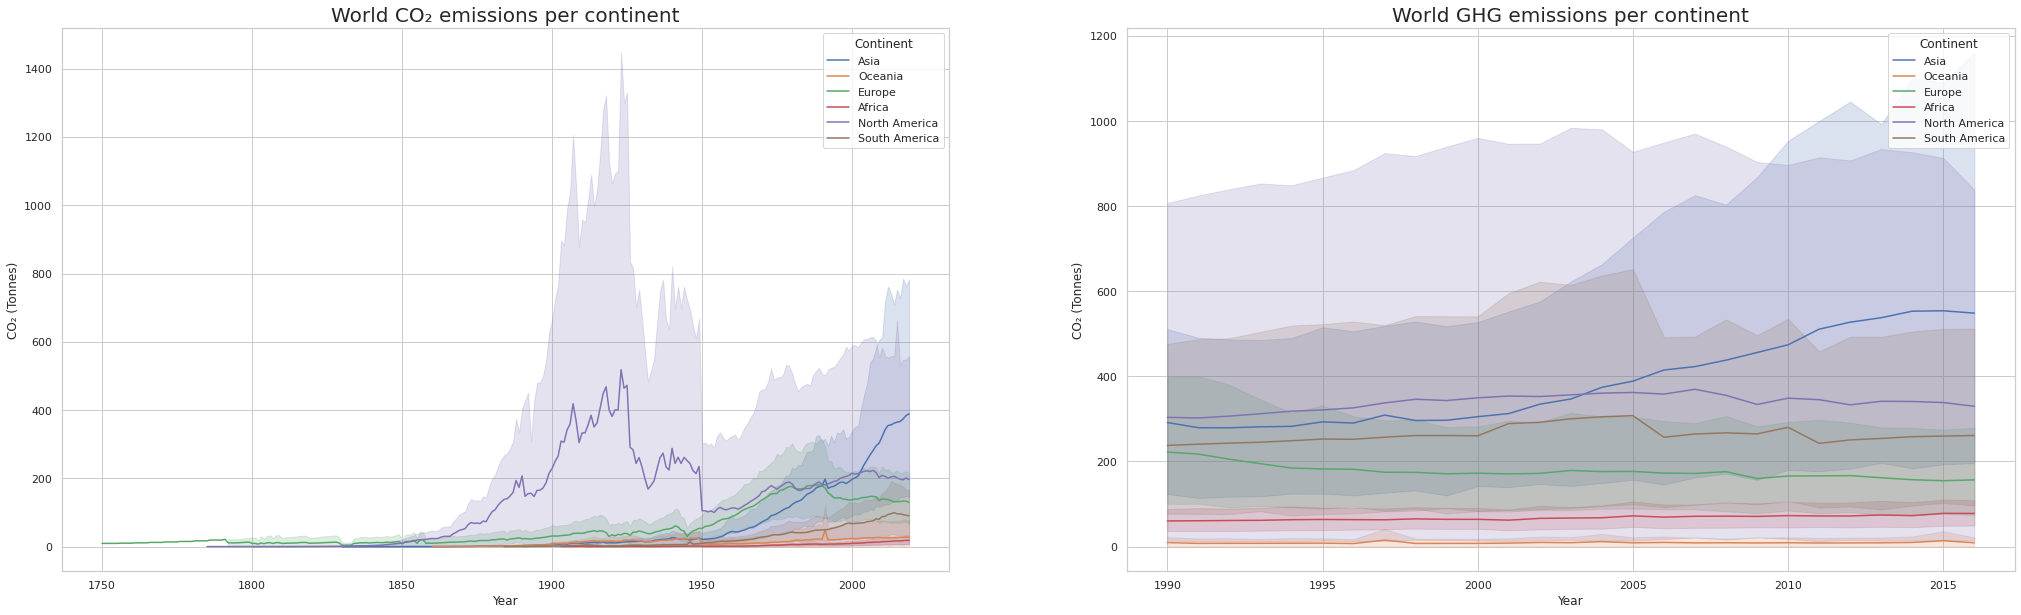

In [ ]:
plt.rcParams["figure.figsize"] = (35, 10)
sns.set_style('whitegrid')
plt.subplot (1,2,1)
sns.lineplot(x = "Year",y = "CO2", hue = "Continent", data = df)
plt.title("World CO₂ emissions per continent", fontsize = 20)
plt.ylabel('CO₂ (Tonnes)')
plt.xlabel('Year')

plt.rcParams["figure.figsize"] = (35, 10)
sns.set_style('whitegrid')
plt.subplot (1,2,2)
sns.lineplot(x = "Year",y = "GHG", hue = "Continent", data = df)
plt.title("World GHG emissions per continent", fontsize = 20)
plt.ylabel('CO₂ (Tonnes)')
plt.xlabel('Year')

There is no data for GHG emissions before 1990 and after 2016, but it can be easily be seen that the worst years are the most recent years for both types of emissions.
Further analysis will explore emissions from 2012 to 2016.

## United States vs. European Union CO₂ emissions (1750-2016)

1. Lead by Europe
2. Europe dip in 1950
3. America takeover in 1985

Text(0.5, 0, 'Year')

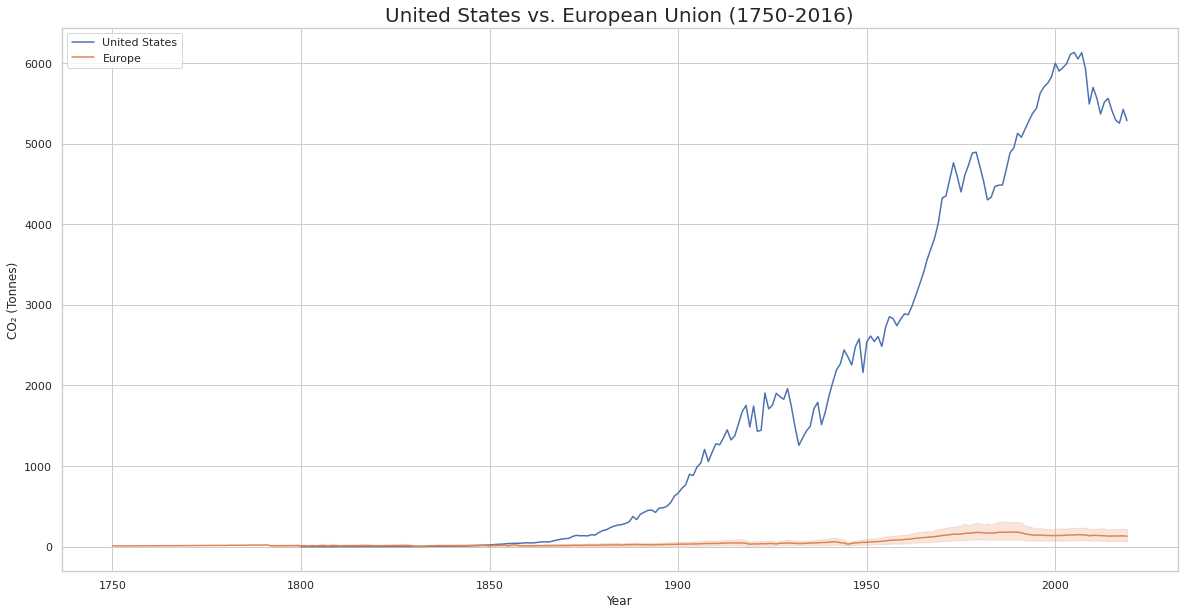

In [ ]:
plt.figure(figsize = (20,10))
plt.title("United States vs. European Union (1750-2016)", fontsize = 20)
sns.lineplot(x  = "Year", y = "CO2", label = "United States", data = df[df['Country'] == "United States"])
sns.lineplot(x  = "Year", y ="CO2", label = "Europe", data = df[df['Continent'] == "Europe"])
plt.ylabel('CO₂ (Tonnes)')
plt.xlabel('Year')

## China vs. India CO₂ emissions (1750-2016)

From virtually an industrial backwater in 1978, China is now the world's biggest producer of concrete, steel, ships and textiles, and has the world's largest automobile market. **Chinese steel output quadrupled between 1980 and 2000, and from 2000 to 2006 rose from 128.5 million tons to 418.8 million tons**, one-third of global production

This increase in production is largely the result of the removal of barriers to entry and increased competition; the number of industrial firms rose from 377,300 in 1980 to nearly 8 million in 1990 and 1996; the 2004 economic census, which excluded enterprises with annual sales below RMB 5 million, counted 1.33 million manufacturing firms, with Jiangsu and Zhejiang reporting more firms than the nationwide total for 1980.

Text(0.5, 0, 'Year')

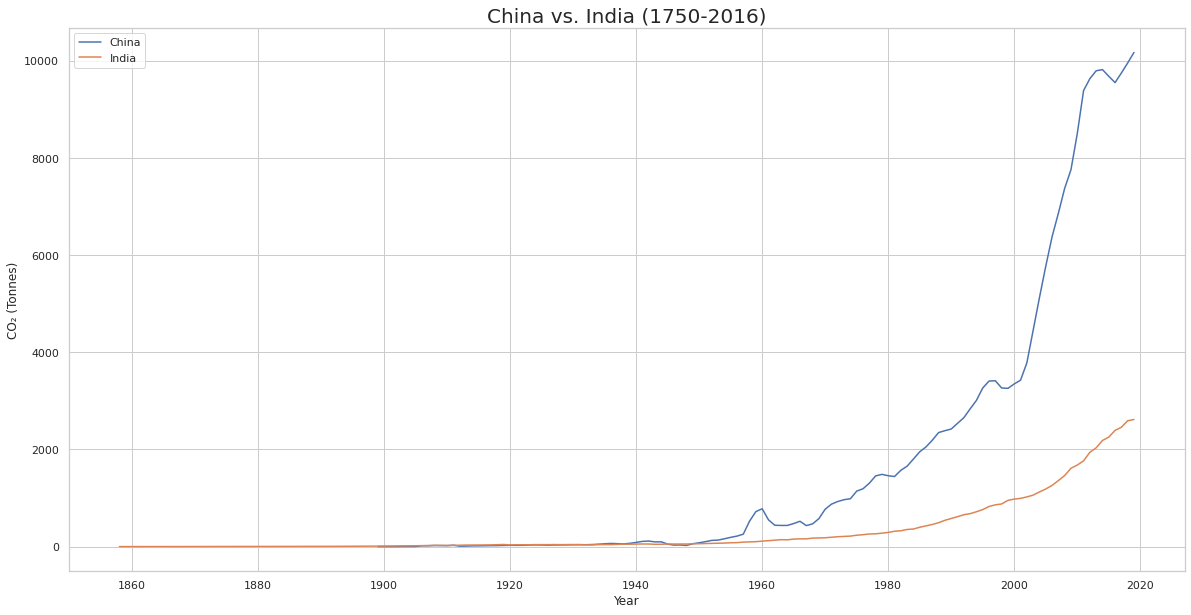

In [ ]:
plt.figure(figsize = (20,10))
plt.title("China vs. India (1750-2016)", fontsize = 20)
sns.lineplot(x  = "Year", y = "CO2", label = "China", data = df[df['Country'] == "China"])
sns.lineplot(x  = "Year", y ="CO2", label = "India", data = df[df['Country'] == "India"])
plt.ylabel('CO₂ (Tonnes)')
plt.xlabel('Year')

## Countrywise cumulative CO₂ and GHG emissions

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

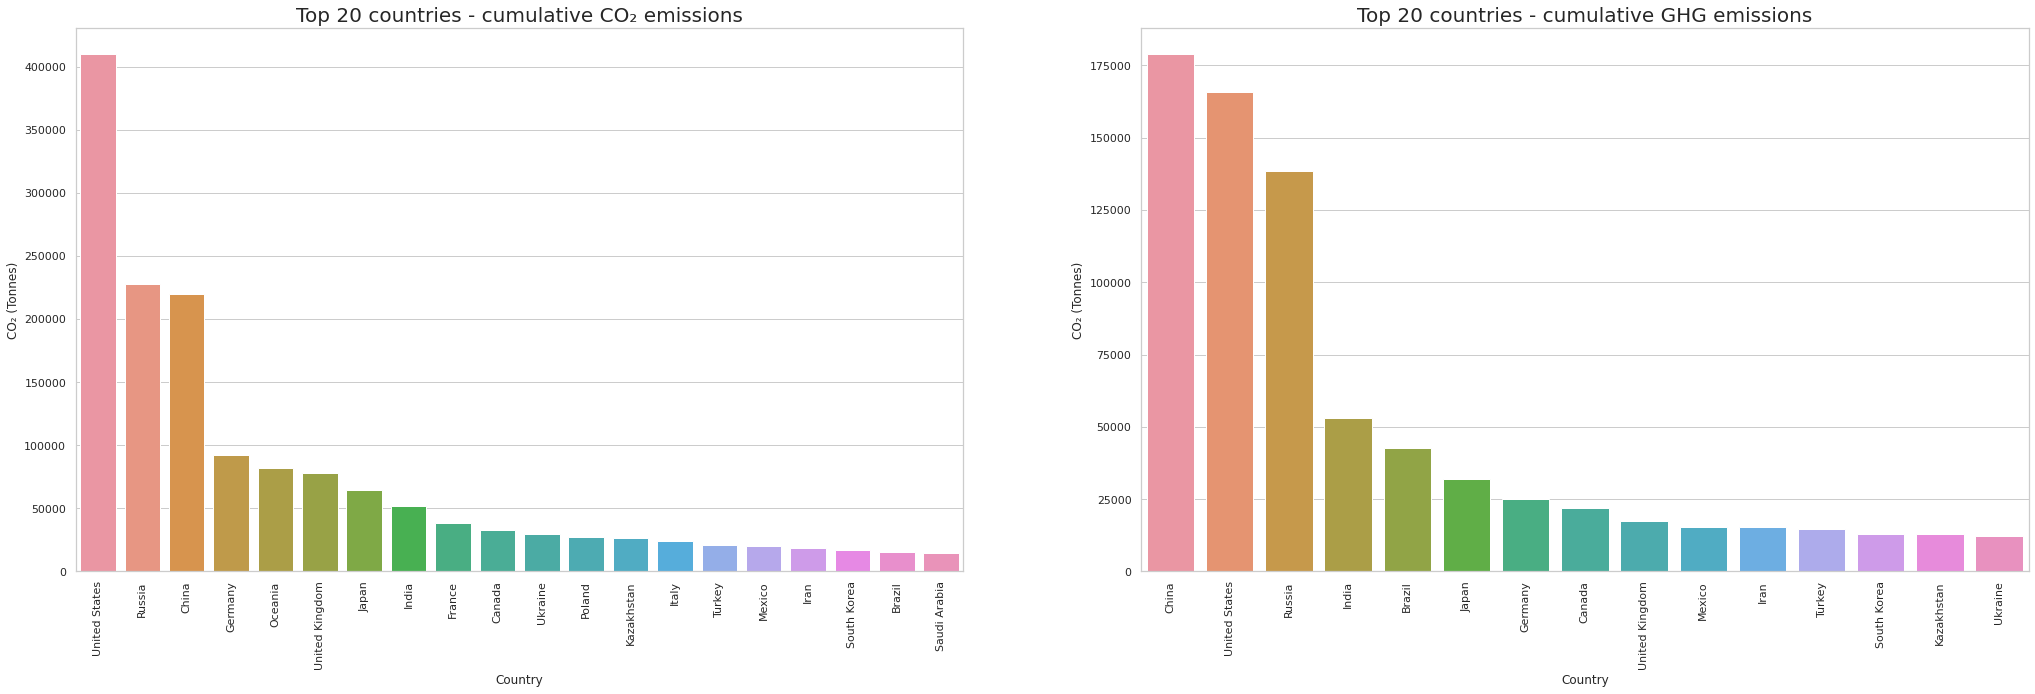

In [ ]:
# Let's group data by country
top_df = df.groupby('Country').sum()
top_df.reset_index(inplace = True)

# Let's organize data for CO2 emissions from highest to lowest by Country
top_df = top_df.sort_values('CO2', ascending = False)
top_df = top_df.head(20)

# Barchart
plt.rcParams["figure.figsize"] = (35, 10)
sns.set_style('whitegrid')
plt.subplot (1,2,1)
sns.barplot(x = top_df['Country'], y = top_df['CO2'])
plt.title('Top 20 countries - cumulative CO₂ emissions', fontsize = 20)
plt.ylabel('CO₂ (Tonnes)')
plt.xlabel('Country')
plt.xticks(rotation = 90)

# Let's organize data for GHG emissions from highest to lowest by Country
top_df2 = top_df.sort_values('GHG', ascending = False)
top_df2 = top_df2.head(15)

#barchart
plt.rcParams["figure.figsize"] = (35, 10)
sns.set_style('whitegrid')
plt.subplot (1,2,2)
sns.barplot(x = top_df2['Country'], y = top_df2['GHG'])
plt.title('Top 20 countries - cumulative GHG emissions', fontsize = 20)
plt.ylabel('CO₂ (Tonnes)')
plt.xlabel('Country')
plt.xticks(rotation = 90)

As expected the two of the modern-day super powers (USA and China) are the largest contributors amongst all other countries. 

Further we will take a closer look to these two countries and analyze their emissions to see how they contribute to climate change.

## United States vs. China Population and GDP (1750-2016)

Text(0.5, 0, 'Year')

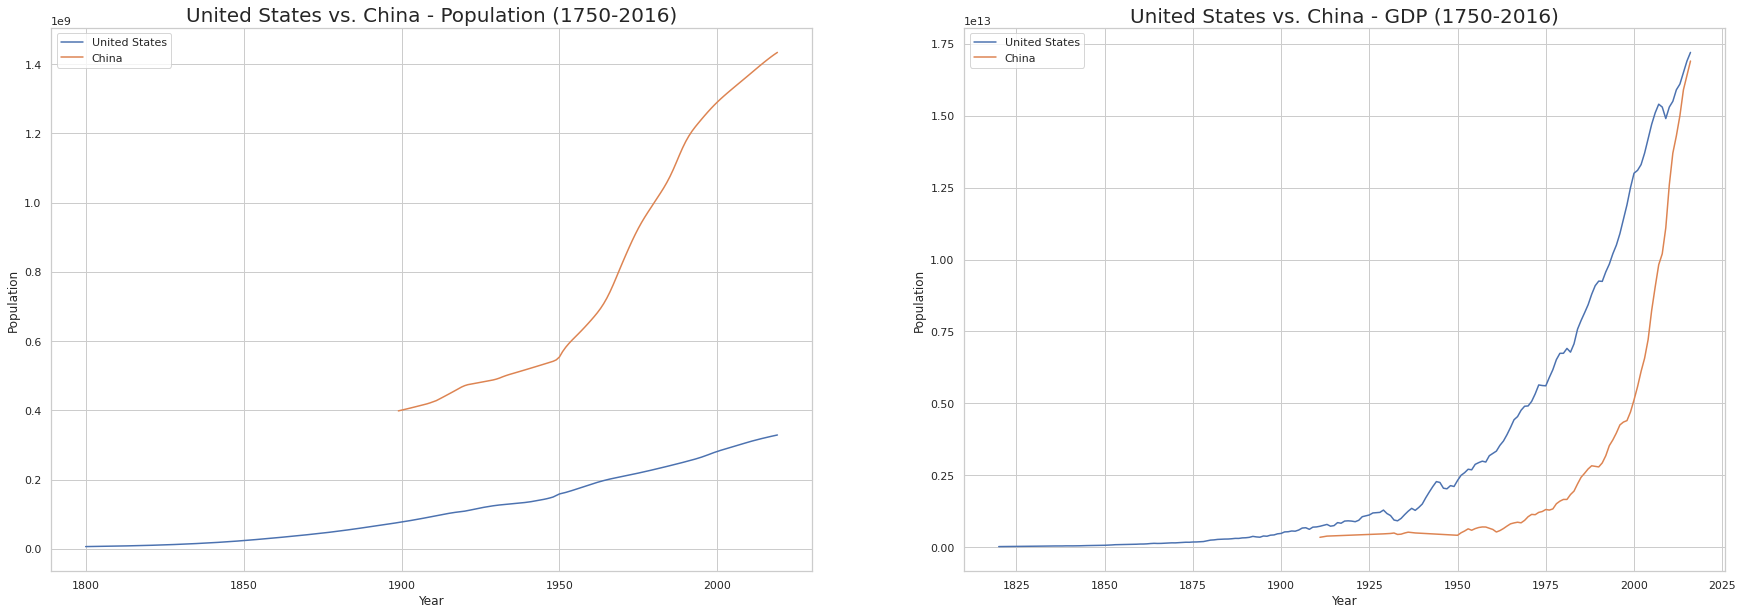

In [ ]:
plt.rcParams["figure.figsize"] = (30, 10)
plt.subplot (1,2,1)
plt.title("United States vs. China - Population (1750-2016)", fontsize = 20)
sns.lineplot(x  = "Year", y = "Population", label = "United States", data = df[df['Country'] == "United States"])
sns.lineplot(x  = "Year", y ="Population", label = "China", data = df[df['Country'] == "China"])
plt.ylabel('Population')
plt.xlabel('Year')

plt.rcParams["figure.figsize"] = (30, 10)
plt.subplot (1,2,2)
plt.title("United States vs. China - GDP (1750-2016)", fontsize = 20)
sns.lineplot(x  = "Year", y = "GDP", label = "United States", data = df[df['Country'] == "United States"])
sns.lineplot(x  = "Year", y ="GDP", label = "China", data = df[df['Country'] == "China"])
plt.ylabel('Population')
plt.xlabel('Year')


## United States vs. China CO₂ and GHG emissions (1750-2016)

Text(0.5, 0, 'Year')

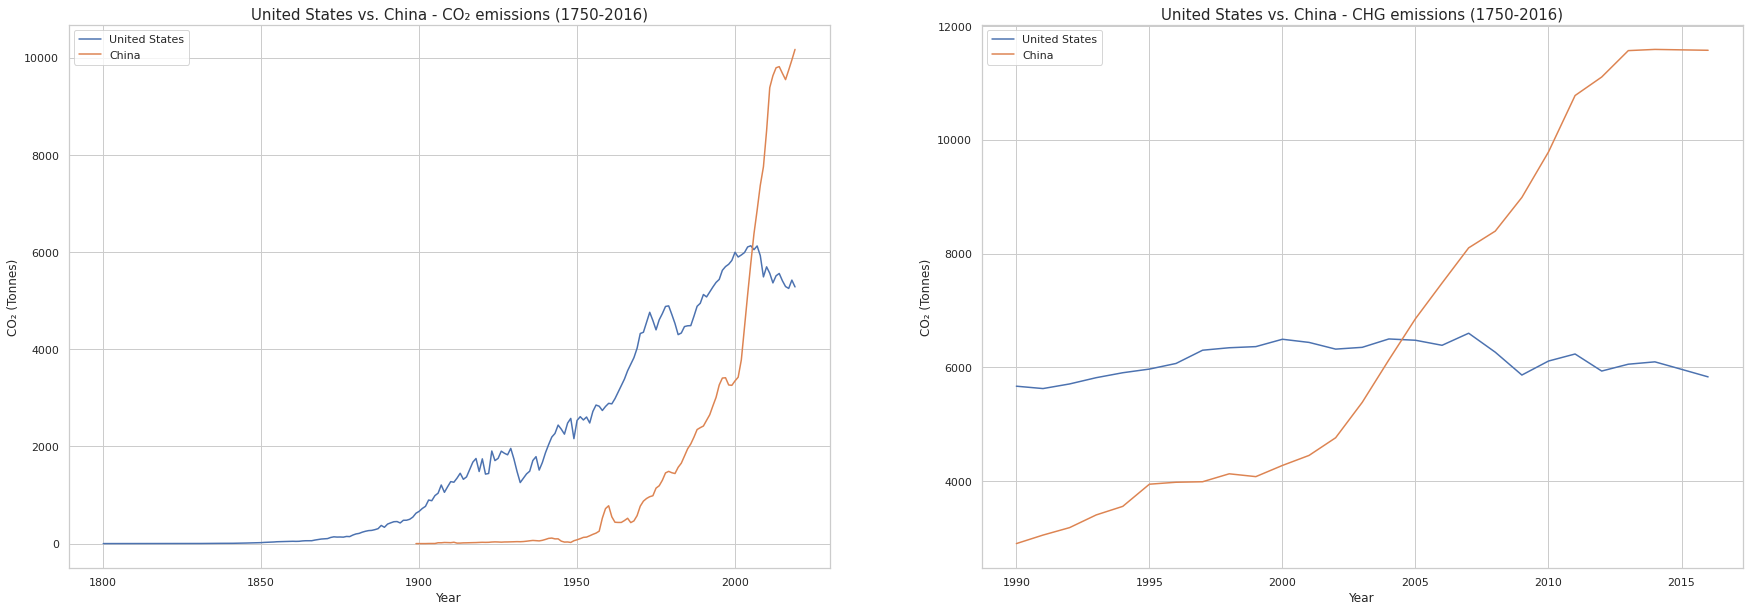

In [ ]:
plt.rcParams["figure.figsize"] = (30, 10)
plt.subplot (1,2,1)
plt.title("United States vs. China - CO₂ emissions (1750-2016)", fontsize = 15)
sns.lineplot(x  = "Year", y = "CO2", label = "United States", data = df[df['Country'] == "United States"])
sns.lineplot(x  = "Year", y ="CO2", label = "China", data = df[df['Country'] == "China"])
plt.ylabel('CO₂ (Tonnes)')
plt.xlabel('Year')

plt.rcParams["figure.figsize"] = (30, 10)
plt.subplot (1,2,2)
plt.title("United States vs. China - CHG emissions (1750-2016)", fontsize = 15)
sns.lineplot(x  = "Year", y = "GHG", label = "United States", data = df[df['Country'] == "United States"])
sns.lineplot(x  = "Year", y = "GHG", label = "China", data = df[df['Country'] == "China"])
plt.ylabel('CO₂ (Tonnes)')
plt.xlabel('Year')

From 1750 (when emissions are thought to have been virtually zero) until the end of 2018, China produced about 210.20 billion tonnes of CO2. The US produced 404.77 billion tonnes in the same period.

# **Data wrengling**

For this analysis we will use information provided between 2012-2016, so we will create a new DataFrame that includes only these years:

In [ ]:
# Selecting data for the years between 2012-2016 and creating a new DataFrame with that
years_df = df[(df['Year'] >= 2012) & (df['Year'] <= 2016)]
years_df.head()

,Code,Country,Year,CO2,Cement,Coal,Flaring,Gas,Oil,Other industry,GHG,Methane,Nitrous Oxide,Primary Energy Consumption,Population,GDP,Continent
63,AFG,Afghanistan,2012,10.219,0.029,3.125,NaN,0.308,6.756,NaN,67.05,48.78,7.16,NaN,31161000.0,5.916690e+10,Asia
64,AFG,Afghanistan,2013,8.441,0.036,3.327,NaN,0.297,4.782,NaN,76.29,58.13,7.72,NaN,32270000.0,6.299370e+10,Asia
65,AFG,Afghanistan,2014,7.774,0.029,3.704,NaN,0.271,3.770,NaN,86.60,67.77,8.55,NaN,33371000.0,6.434611e+10,Asia
66,AFG,Afghanistan,2015,7.904,0.041,2.843,NaN,0.282,4.738,NaN,93.54,76.62,8.59,NaN,34414000.0,6.278339e+10,Asia
67,AFG,Afghanistan,2016,6.745,0.076,2.878,NaN,0.319,3.472,NaN,96.59,78.17,9.13,NaN,35383000.0,6.429743e+10,Asia


I am going to drop the nulls in 'CO₂' and 'GHG' columns. Other than that, 
none of the columns I'm interested for the purpose of this analysis have nulls.

In [ ]:
years_df['CO2'].dropna()

63       10.219
64        8.441
65        7.774
66        7.904
67        6.745
          ...  
32927     7.659
32928    11.617
32929    11.973
32930    12.170
32931    10.815
Name: CO2, Length: 1120, dtype: float64

In [ ]:
years_df['GHG'].dropna()

63       67.05
64       76.29
65       86.60
66       93.54
67       96.59
         ...  
32927    67.63
32928    67.55
32929    66.10
32930    67.49
32931    65.98
Name: GHG, Length: 990, dtype: float64

In [ ]:
# Let's do basic statistics analisys on the emissions between 2012-2016
years_df[['CO2', 'GHG']].describe()

,CO2,GHG
count,1120.000000,990.000000
mean,166.065521,249.993293
std,774.905721,988.519637
min,0.007000,-85.620000
25%,1.263000,7.800000
50%,8.259500,39.050000
75%,61.054250,138.615000
max,9820.360000,11592.120000


Text(0.5, 1.0, 'GHG Distribution 2012-2016')

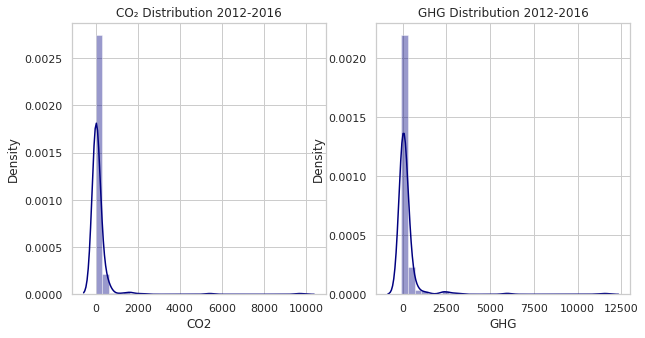

In [ ]:
# Let's look at the distribution of CO2 emissions 2012-2016
plt.figure(figsize = (10, 5))
plt.subplot (1,2,1)
ax = sns.distplot(years_df['CO2'], bins = 30, color = 'navy')
plt.title('CO₂ Distribution 2012-2016')

# Let's look at the distribution of GHG emissions 2012-2016
plt.subplot (1,2,2)
ax = sns.distplot(years_df['GHG'], bins = 30, color = 'navy')
plt.title('GHG Distribution 2012-2016')

# **Hypothesis Testing**


## **Independent Samples T-Test**

**Null hypothesis 1**

There is no statistically significant difference in the mean CO2 emissions for the year of 2012 vs. 2016.

**Null hypothesis 2**

There is no statistically significant difference in the mean CHG emissions for the year of 2012 vs. 2016.




Separating United States and China from the list of countries to prepare for hypothesis testing:

In [ ]:
# Creating a Data Frame with key metrics for United States
usa = (years_df['Country'] == 'United States') 
usa_df = years_df[usa.values]
usa_df.head()

,Code,Country,Year,CO2,Cement,Coal,Flaring,Gas,Oil,Other industry,GHG,Methane,Nitrous Oxide,Primary Energy Consumption,Population,GDP,Continent
32078,USA,United States,2012,5367.569,35.270,1682.603,49.222,1388.114,2182.229,30.129,5936.09,648.75,251.80,24986.515,314044000.0,1.590000e+13,North America
32079,USA,United States,2013,5514.029,36.369,1739.503,54.975,1427.472,2224.935,30.776,6056.31,643.66,251.19,25679.335,316400992.0,1.610000e+13,North America
32080,USA,United States,2014,5561.719,39.439,1732.212,60.163,1455.405,2242.391,32.110,6097.75,650.62,251.37,25968.993,318672992.0,1.650000e+13,North America
32081,USA,United States,2015,5412.432,39.907,1503.253,61.985,1497.933,2278.794,30.560,5966.46,648.55,249.24,25739.632,320878016.0,1.690000e+13,North America
32082,USA,United States,2016,5292.268,39.439,1378.160,52.850,1509.030,2285.330,27.458,5833.49,629.38,251.70,25733.260,323016000.0,1.720000e+13,North America


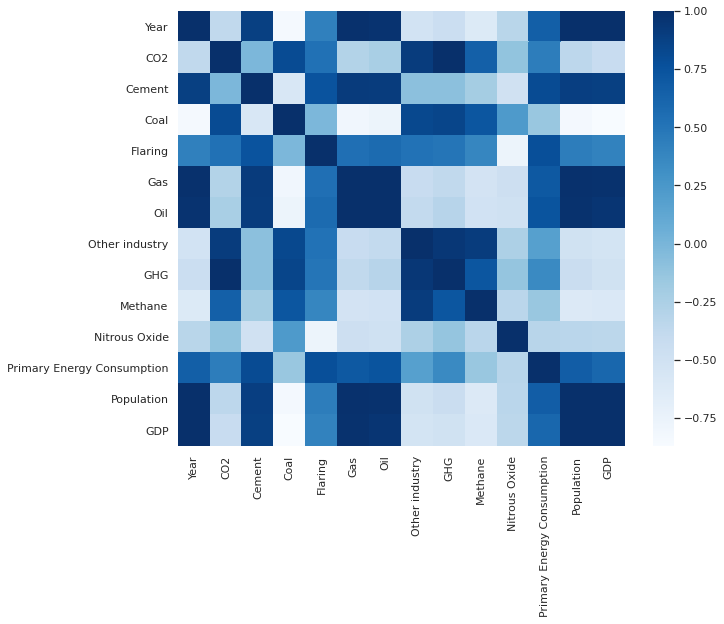

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(usa_df.corr(), cmap = 'Blues')
plt.show;

In [ ]:
# Creating a Data Frame with key metrics for China
china = (years_df['Country'] == 'China') 
china_df = years_df[china.values]
china_df.head()

,Code,Country,Year,CO2,Cement,Coal,Flaring,Gas,Oil,Other industry,GHG,Methane,Nitrous Oxide,Primary Energy Consumption,Population,GDP,Continent
15574,CHN,China,2012,9633.899,714.782,7464.806,NaN,277.599,1176.712,NaN,11106.42,1166.63,510.88,32558.223,1.384206e+09,1.430000e+13,Asia
15575,CHN,China,2013,9796.527,748.323,7493.454,NaN,320.127,1234.622,NaN,11570.95,1195.91,524.10,33814.393,1.391883e+09,1.500000e+13,Asia
15576,CHN,China,2014,9820.360,778.627,7425.069,NaN,353.591,1263.073,NaN,11592.12,1225.98,536.93,34595.649,1.399454e+09,1.590000e+13,Asia
15577,CHN,China,2015,9683.201,721.995,7266.979,NaN,366.649,1327.578,NaN,11584.22,1258.21,552.98,35001.978,1.406848e+09,1.640000e+13,Asia
15578,CHN,China,2016,9552.517,743.044,7071.406,NaN,402.762,1335.304,NaN,11576.87,1264.91,556.98,35437.843,1.414049e+09,1.690000e+13,Asia


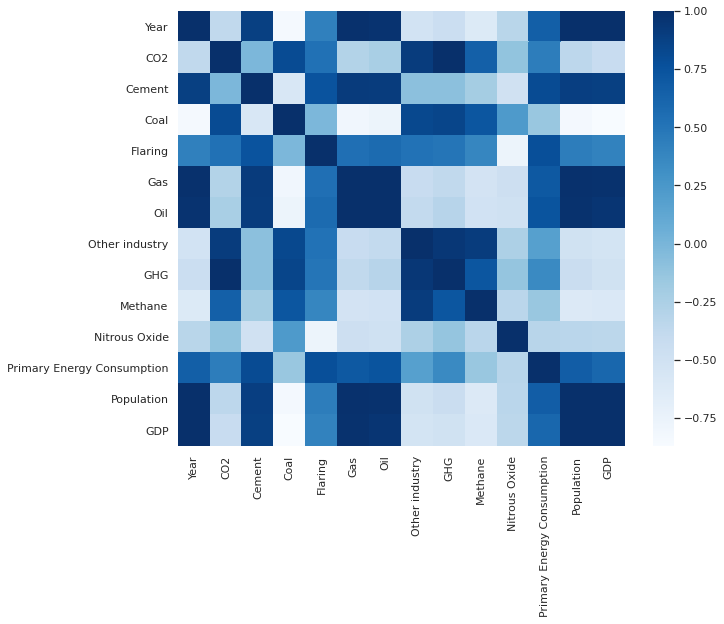

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(usa_df.corr(), cmap = 'Blues')
plt.show;

Let's run descriptive statistics on our two samples:

In [ ]:
usa_df[['CO2', 'GHG']].describe()

,CO2,GHG
count,5.000000,5.000000
mean,5429.603400,5978.020000
std,109.071478,103.977493
min,5292.268000,5833.490000
25%,5367.569000,5936.090000
50%,5412.432000,5966.460000
75%,5514.029000,6056.310000
max,5561.719000,6097.750000


In [ ]:
china_df[['CO2', 'GHG']].describe()

,CO2,GHG
count,5.00000,5.000000
mean,9697.30080,11486.116000
std,111.99369,212.404915
min,9552.51700,11106.420000
25%,9633.89900,11570.950000
50%,9683.20100,11576.870000
75%,9796.52700,11584.220000
max,9820.36000,11592.120000


## United States vs. China CO₂ emissions between 2012-2016

Text(0.5, 0, 'Year')

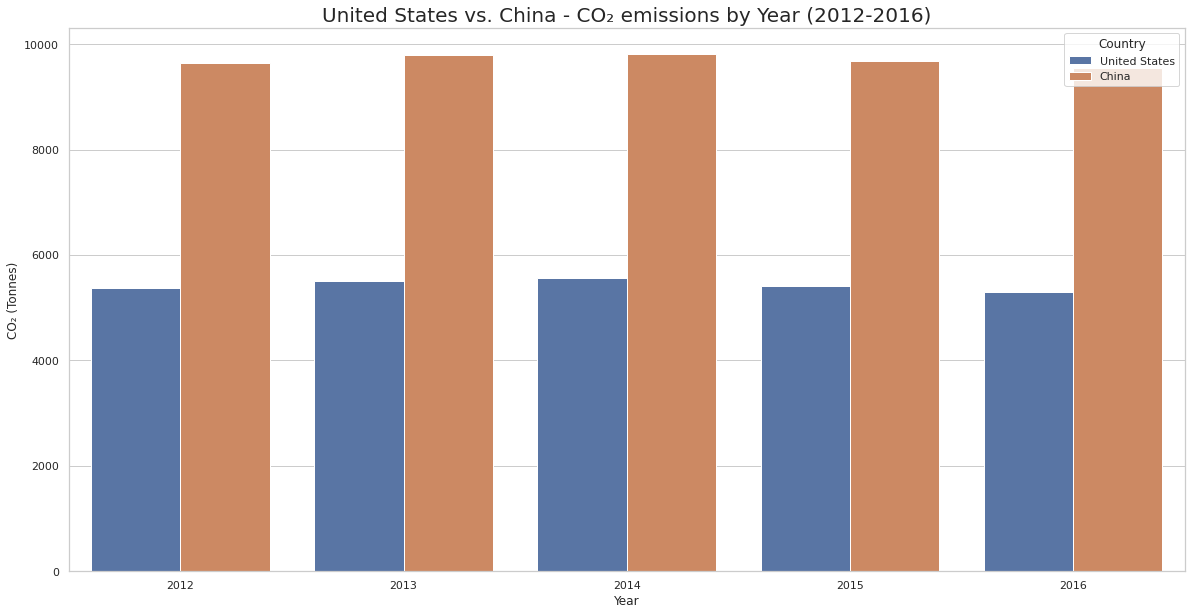

In [ ]:
usa_df['Country'] = 'United States'
china_df['Country'] = 'China'

DF = pd.concat([usa_df, china_df])

plt.figure(figsize = (20,10))
plt.title("United States vs. China - CO₂ emissions by Year (2012-2016)", fontsize = 20)
sns.barplot(data = DF, x='Year', y='CO2', hue='Country')
plt.ylabel('CO₂ (Tonnes)')
plt.xlabel('Year')

## United States vs. China GHG emissions between 2012-2016

Text(0.5, 0, 'Year')

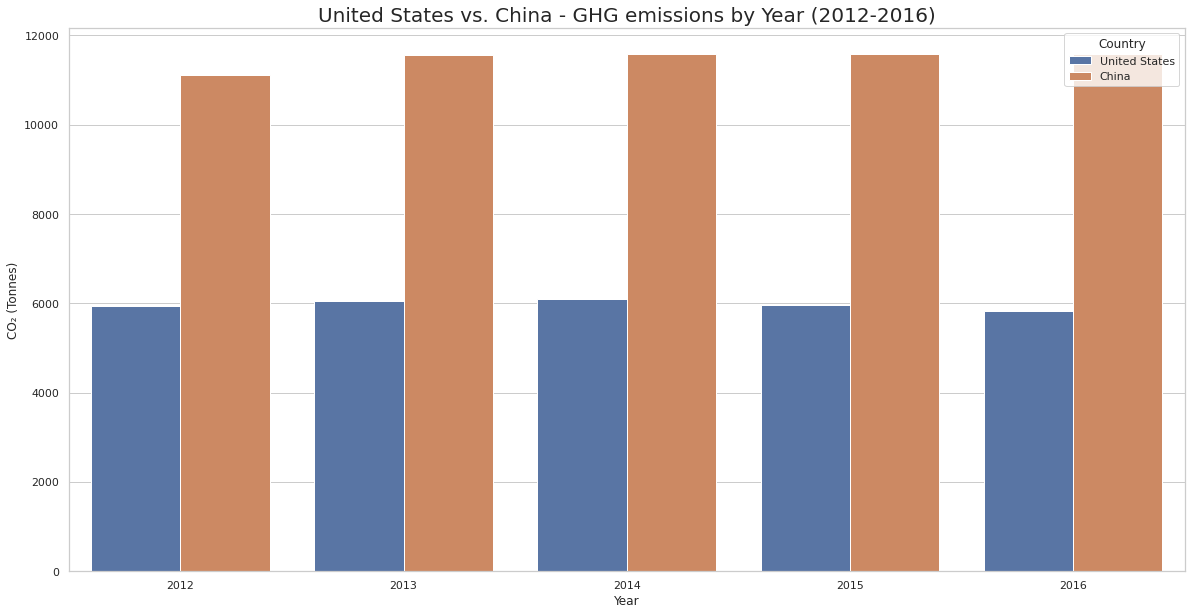

In [ ]:
usa_df['Country'] = 'United States'
china_df['Country'] = 'China'

DF = pd.concat([usa_df, china_df])


plt.figure(figsize = (20,10))
plt.title("United States vs. China - GHG emissions by Year (2012-2016)", fontsize = 20)
sns.barplot(data = DF, x='Year', y='GHG', hue='Country')
plt.ylabel('CO₂ (Tonnes)')
plt.xlabel('Year')

## **Carbon Dioxide(CO₂)** Hypothesis 1, Testing

It's time to perform independent samples t-test.

*   Ho: p1 - p2 = 0
*   Ha: p1 - p2 ≠ 0


H₀: There is no statistically significant difference in the mean CO₂ emissions for United States vs. China.

Hₐ: There is statistically significant difference in the mean CO₂ emissions for United States vs. China.



Compare the distributions of the two samples. They appear to be approximately normal.

Text(0.5, 0, 'CO₂ (Tonnes)')

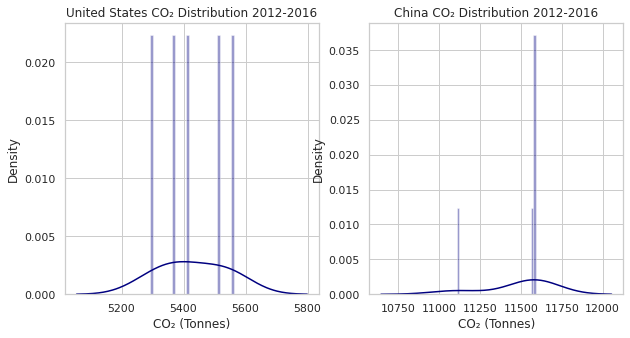

In [ ]:
# Let's look at the distribution of CO2 emissions 2012-2016
plt.figure(figsize = (10, 5))
plt.subplot (1,2,1)
ax = sns.distplot(usa_df['CO2'], bins = 30, color = 'navy',)
plt.title('United States CO₂ Distribution 2012-2016')
plt.xlabel('CO₂ (Tonnes)')

# Let's look at the distribution of GHG emissions 2012-2016
plt.subplot (1,2,2)
ax = sns.distplot(china_df['GHG'], bins = 30, color = 'navy')
plt.title('China CO₂ Distribution 2012-2016')
plt.xlabel('CO₂ (Tonnes)')

In [ ]:
# Hypothesis 1 independent samples t-test
stats.ttest_ind(usa_df['CO2'], china_df['CO2'])

Ttest_indResult(statistic=-61.04292814117637, pvalue=5.76477083016048e-12)

That's a significant P-value at p =
5.76477083016048e-12. Next, calculate the confidence intervals and Cohen's d:

In [ ]:
# Calculate the standard error and compute the confidence intervals
#confidence intervals

sample_1_n = usa_df.shape[0]
sample_2_n = china_df.shape[0]
sample_1_mean = usa_df['CO2'].mean()
sample_2_mean = china_df['CO2'].mean()
sample_1_var = usa_df['CO2'].var()
sample_2_var = china_df['CO2'].var()


std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

# Cohen's d function

def get_cohens_d(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    s_pooled = math.sqrt((sample_1_var + sample_2_var)/2)
    cohens = (sample_1_mean - sample_2_mean) / s_pooled
    
    return("Cohen's d is: "+ str(cohens)+ ".")
  
print(get_cohens_d(usa_df['CO2'], china_df['CO2']))

The difference in means at the 95% confidence interval is between 4130.667818380739 and 4404.726981619261.
Cohen's d is: -38.60693759442114.


How are Carbon Dioxide emissions distributed across United States and China?

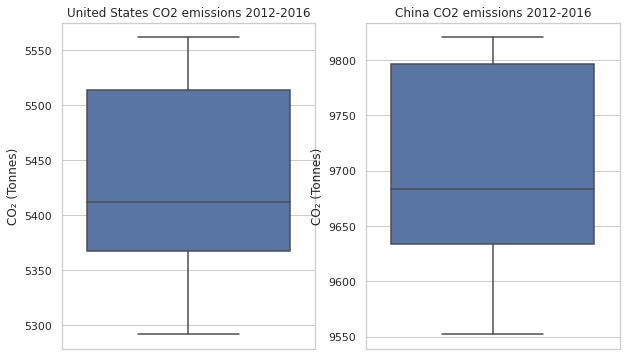

In [ ]:
plt.rcParams["figure.figsize"] = (10, 6)
plt.subplot(1,2,1)
sns.boxplot( y = 'CO2', data = usa_df)
plt.title('United States CO2 emissions 2012-2016')
plt.ylabel('CO₂ (Tonnes)')

plt.rcParams["figure.figsize"] = (10, 6)
plt.subplot(1,2,2)
sns.boxplot( y = 'CO2', data = china_df)
plt.title('China CO2 emissions 2012-2016')
plt.ylabel('CO₂ (Tonnes)')

plt.show;

## Testing Hypothesis 1, Results

Reject the null hypothesis that there is statistical significant difference between mean of CO₂ emissions for United States and China between 2012-2016.

Our p value is very small and the difference between our two means is -61.04 standard deviations, indicating that our difference between CO₂ means is statistically significant and is unlikely to be due to random chance.

## **Greenhouse Gas(GHG)** Hypothesis 2, Testing

*   Ho: p1 - p2 = 0
*   Ha: p1 - p2 ≠ 0

H₀: There is no statistically significant difference in the mean GHG emissions for United States vs. China.

Hₐ: There is statistically significant difference in the mean GHG emissions for United States vs. China.


Compare the distributions of the two samples. They appear to be approximately normal.

Text(0.5, 0, 'CO₂ (Tonnes)')

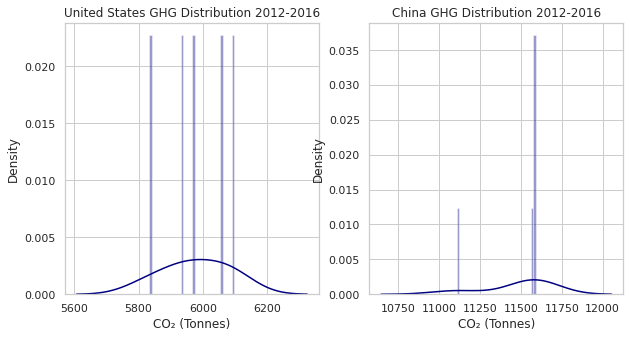

In [ ]:
# Let's look at the distribution of CO2 emissions 2012-2016
plt.figure(figsize = (10, 5))
plt.subplot (1,2,1)
ax = sns.distplot(usa_df['GHG'], bins = 30, color = 'navy')
plt.title('United States GHG Distribution 2012-2016')
plt.xlabel('CO₂ (Tonnes)')

# Let's look at the distribution of GHG emissions 2012-2016
plt.subplot (1,2,2)
ax = sns.distplot(china_df['GHG'], bins = 30, color = 'navy')
plt.title('China GHG Distribution 2012-2016')
plt.xlabel('CO₂ (Tonnes)')

In [ ]:
# Hypothesis 2 independent samples t-test
stats.ttest_ind(usa_df['GHG'], china_df['GHG'])

Ttest_indResult(statistic=-52.08049376591839, pvalue=2.0474467618870344e-11)

That's a significant P-value at p = 2.0474467618870344e-11. Next, calculate the confidence intervals and Cohen's d:

In [ ]:
# Calculate the standard error and compute the confidence intervals
#confidence intervals

sample_1_n = usa_df.shape[0]
sample_2_n = china_df.shape[0]
sample_1_mean = usa_df['GHG'].mean()
sample_2_mean = china_df['GHG'].mean()
sample_1_var = usa_df['GHG'].var()
sample_2_var = china_df['GHG'].var()


std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

# Cohen's d function

def get_cohens_d(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    s_pooled = math.sqrt((sample_1_var + sample_2_var)/2)
    cohens = (sample_1_mean - sample_2_mean) / s_pooled
    
    return("Cohen's d is: "+str(cohens)+ ".")
  
print(get_cohens_d(usa_df['GHG'], china_df['GHG']))

The difference in means at the 95% confidence interval is between 5300.804029833144 and 5715.38797016686.
Cohen's d is: -32.93859639330046.


How are Greenhouse Gas emissions distributed across United States and China?

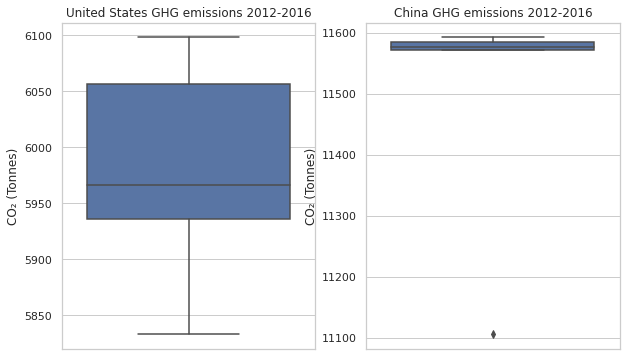

In [ ]:

plt.rcParams["figure.figsize"] = (10, 6)
plt.subplot(1,2,1)
sns.boxplot(y = 'GHG', data = usa_df)
plt.title('United States GHG emissions 2012-2016')
plt.ylabel('CO₂ (Tonnes)')


plt.subplot(1,2,2)
sns.boxplot( y = 'GHG', data = china_df)
plt.title('China GHG emissions 2012-2016')
plt.ylabel('CO₂ (Tonnes)')

plt.show;

## Testing Hypothesis 2, Results

Based on these results I would reject the null hypothesis that there is statistical significant difference between mean of GHG emissions for United States and China between 2012-2016.

Our p value is very small and the difference between our two means is -52.08 standard deviations, indicating that our difference between the two means is statistically significant.

# **Conclusion**

It appears that I was able to reject the nulls for both hypothesis. There is a statistically significant difference between the means of CO₂ emissions for United States and China for 2012-2016. Aswell for Greenhouse Gas emissions, since both tests had extremely small p values.

China's carbon dioxide and greenhouse gas emissions exceedes those of the U.S. and other developed nations combined in the latest years. 

According to research published by Rhodium Group in 2021, China has been responsible in 2019 for more than 27% of total global emissions. The U.S., the world's second-highest emitter, accounts for 11% of the global total. Followed by India which is responsible for 6.6% of global emissions, edging out the 27 nations in the EU, which account for 6.4%.

I think anyone who's interested in climate change would find valuables insights here. The intended audience can glean insights that help them think about the future of the emissions.

Global CO₂ emissions have seen a sharp increase in recent years, governments are fighting to slowing it down with increasing global awareness for CO₂ emissions and new global policies to combat CO₂ emissions (e.g. Paris 2050 and Kyoto 2020). It is safe to predict that the CO2 emissions will eventually come to a steady-state, but this cannot be achived without proactive efforts from all countries, especially, China, USA, India, and Europe.

As I continue to improve my data analytics abilities, I'm excited to continue researching this topic to uncover more insights about carbon dioxide and greenhouse emissions.